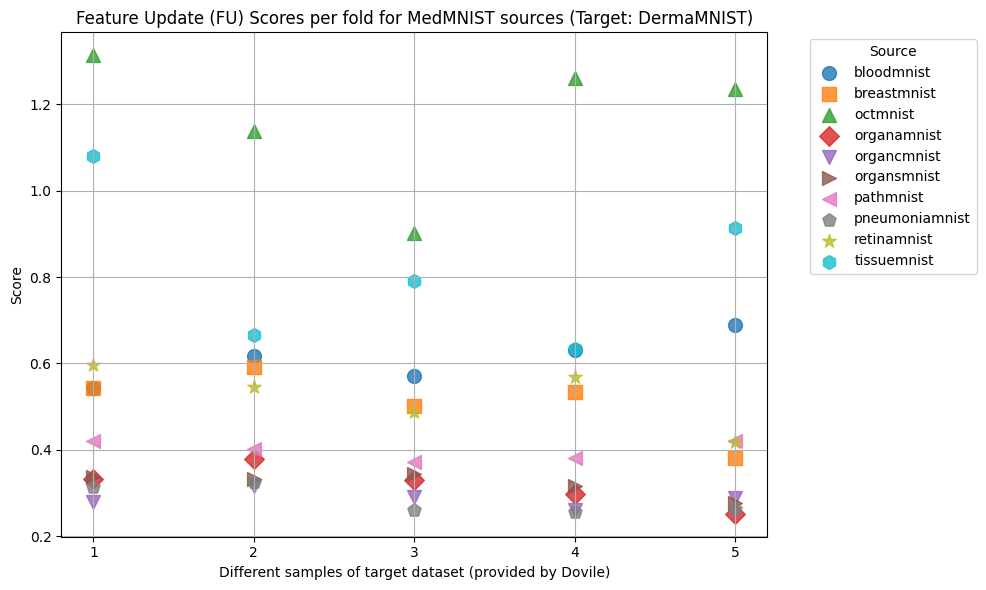

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to your 5 CSV files (adjust as needed)
csv_files = [
    "src/results/fu_dataset_fold1.csv",
    "src/results/fu_dataset_fold2.csv",
    "src/results/fu_dataset_fold3.csv",
    "src/results/fu_dataset_fold4.csv",
    "src/results/fu_dataset_fold5.csv",
]

# List of unique markers for each source
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
marker_map = {}  # Will be filled based on source names

# Store scores by source across folds
source_scores = {}

# Read and process each fold
for fold_idx, file in enumerate(csv_files):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        source = row['source']
        score = row['dermamnist']
        if source not in source_scores:
            source_scores[source] = []
        source_scores[source].append((fold_idx + 1, score))  # fold index starts at 1

# Plotting
plt.figure(figsize=(10, 6))

for i, (source, points) in enumerate(source_scores.items()):
    x_vals = [pt[0] for pt in points]
    y_vals = [pt[1] for pt in points]
    marker = markers[i % len(markers)]
    plt.scatter(x_vals, y_vals, marker=marker, label=source, s=100, alpha=0.8)

# Plot settings
plt.xlabel("Different samples of target dataset (provided by Dovile)")
plt.ylabel("Score")
plt.title("Feature Update (FU) Scores per fold for MedMNIST sources (Target: DermaMNIST)")
plt.xticks(range(1, len(csv_files) + 1))
plt.grid(True)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


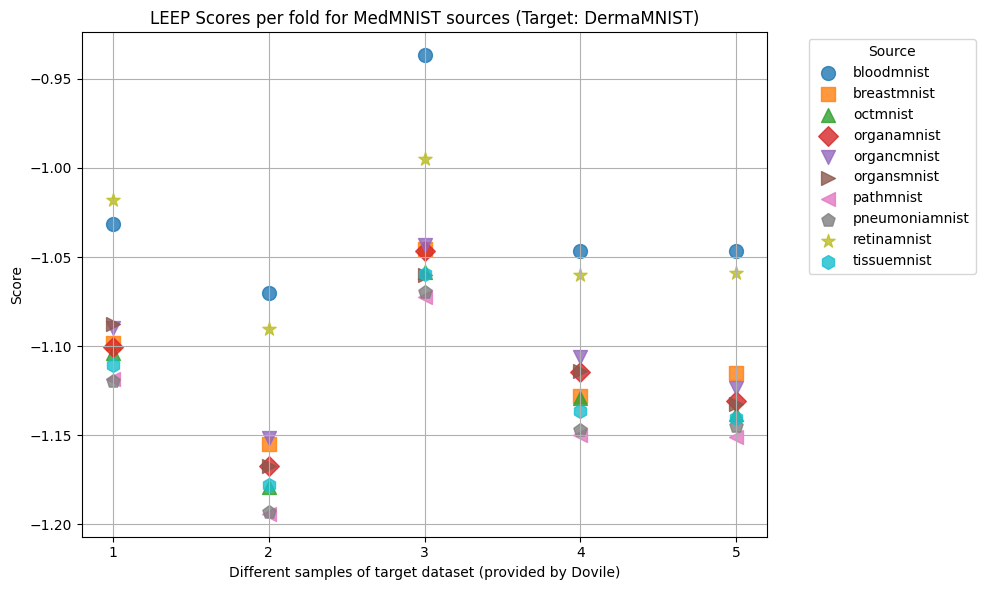

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to your 5 CSV files (adjust as needed)
csv_files = [
    "src/results/leep_dataset_fold1.csv",
    "src/results/leep_dataset_fold2.csv",
    "src/results/leep_dataset_fold3.csv",
    "src/results/leep_dataset_fold4.csv",
    "src/results/leep_dataset_fold5.csv",
]

# List of unique markers for each source
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
marker_map = {}  # Will be filled based on source names

# Store scores by source across folds
source_scores = {}

# Read and process each fold
for fold_idx, file in enumerate(csv_files):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        source = row['source']
        score = row['dermamnist']
        if source not in source_scores:
            source_scores[source] = []
        source_scores[source].append((fold_idx + 1, score))  # fold index starts at 1

# Plotting
plt.figure(figsize=(10, 6))

for i, (source, points) in enumerate(source_scores.items()):
    x_vals = [pt[0] for pt in points]
    y_vals = [pt[1] for pt in points]
    marker = markers[i % len(markers)]
    plt.scatter(x_vals, y_vals, marker=marker, label=source, s=100, alpha=0.8)

# Plot settings
plt.xlabel("Different samples of target dataset (provided by Dovile)")
plt.ylabel("Score")
plt.title("LEEP Scores per fold for MedMNIST sources (Target: DermaMNIST)")
plt.xticks(range(1, len(csv_files) + 1))
plt.grid(True)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


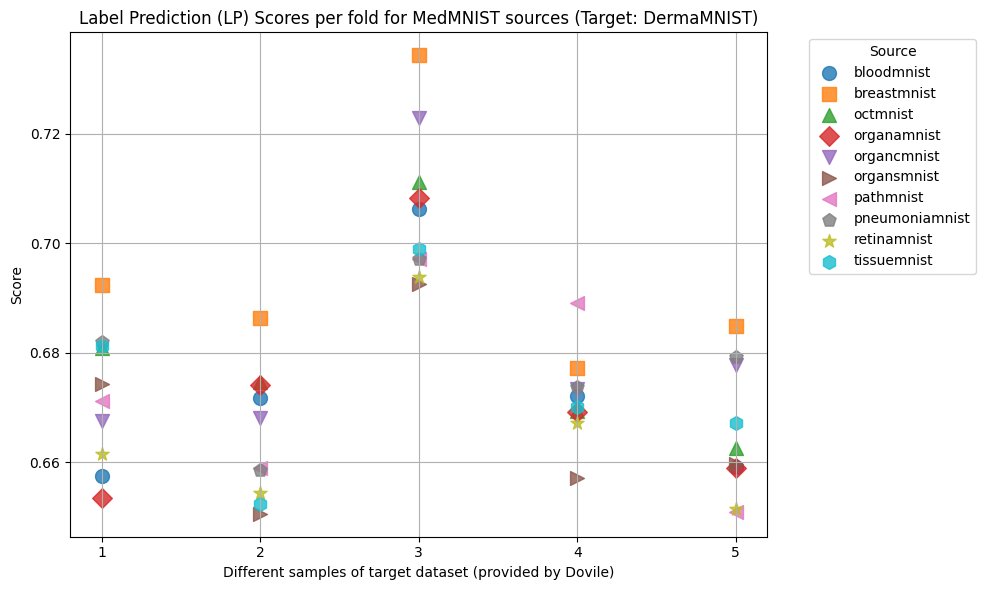

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to your 5 CSV files (adjust as needed)
csv_files = [
    "src/results/lp_dataset_fold1.csv",
    "src/results/lp_dataset_fold2.csv",
    "src/results/lp_dataset_fold3.csv",
    "src/results/lp_dataset_fold4.csv",
    "src/results/lp_dataset_fold5.csv",
]

# List of unique markers for each source
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
marker_map = {}  # Will be filled based on source names

# Store scores by source across folds
source_scores = {}

# Read and process each fold
for fold_idx, file in enumerate(csv_files):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        source = row['source']
        score = row['dermamnist']
        if source not in source_scores:
            source_scores[source] = []
        source_scores[source].append((fold_idx + 1, score))  # fold index starts at 1

# Plotting
plt.figure(figsize=(10, 6))

for i, (source, points) in enumerate(source_scores.items()):
    x_vals = [pt[0] for pt in points]
    y_vals = [pt[1] for pt in points]
    marker = markers[i % len(markers)]
    plt.scatter(x_vals, y_vals, marker=marker, label=source, s=100, alpha=0.8)

# Plot settings
plt.xlabel("Different samples of target dataset (provided by Dovile)")
plt.ylabel("Score")
plt.title("Label Prediction (LP) Scores per fold for MedMNIST sources (Target: DermaMNIST)")
plt.xticks(range(1, len(csv_files) + 1))
plt.grid(True)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
lp_df = pd.read_csv('src/results/lp_dataset_fold5.csv')
fu_df = pd.read_csv('src/results/fu_dataset_fold5.csv')

# Remove any index columns accidentally loaded
lp_df = lp_df.loc[:, ~lp_df.columns.str.contains('^Unnamed')]
fu_df = fu_df.loc[:, ~fu_df.columns.str.contains('^Unnamed')]

# Get list of targets (all columns except 'source')
target_order = [col for col in lp_df.columns if col != 'source']

# Create a new DataFrame for output
lpfu = pd.DataFrame()
lpfu['source'] = lp_df['source']

# TODO: double check
# Compute normalized product for each target
for target in target_order:
    lp_norm = (lp_df[target] - lp_df[target].min()) / (lp_df[target].max() - lp_df[target].min())
    fu_norm = (fu_df[target] - fu_df[target].min()) / (fu_df[target].max() - fu_df[target].min())
    lpfu[target] = lp_norm * fu_norm

# Reset index to match original CSV format
lpfu.reset_index(inplace=True)

# Save to CSV
lpfu.to_csv('src/results/lpfu_dataset_fold5.csv', index=False)

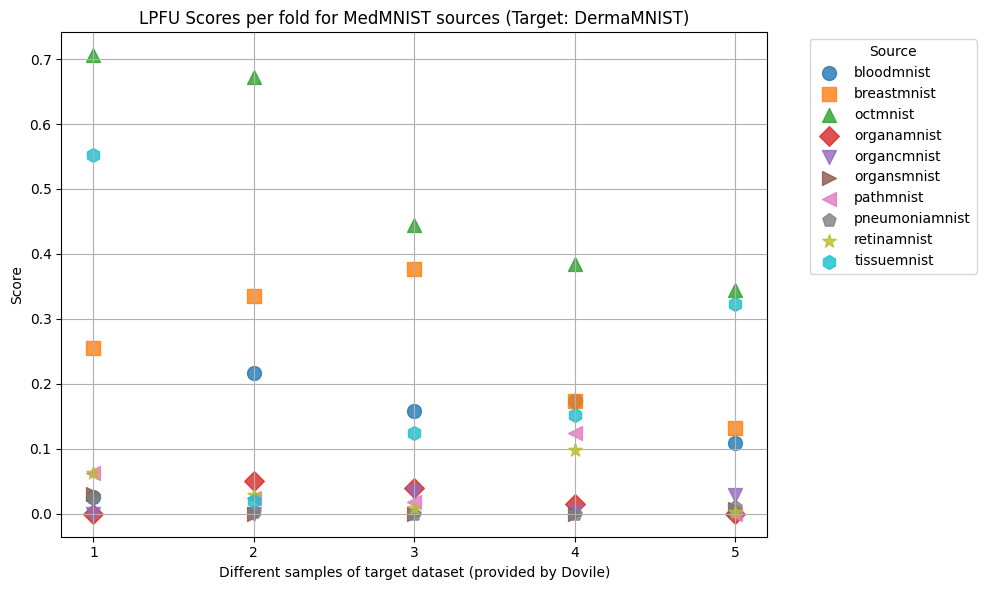

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to your 5 CSV files (adjust as needed)
csv_files = [
    "src/results/lpfu_dataset_fold1.csv",
    "src/results/lpfu_dataset_fold2.csv",
    "src/results/lpfu_dataset_fold3.csv",
    "src/results/lpfu_dataset_fold4.csv",
    "src/results/lpfu_dataset_fold5.csv",
]

# List of unique markers for each source
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
marker_map = {}  # Will be filled based on source names

# Store scores by source across folds
source_scores = {}

# Read and process each fold
for fold_idx, file in enumerate(csv_files):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        source = row['source']
        score = row['dermamnist']
        if source not in source_scores:
            source_scores[source] = []
        source_scores[source].append((fold_idx + 1, score))  # fold index starts at 1

# Plotting
plt.figure(figsize=(10, 6))

for i, (source, points) in enumerate(source_scores.items()):
    x_vals = [pt[0] for pt in points]
    y_vals = [pt[1] for pt in points]
    marker = markers[i % len(markers)]
    plt.scatter(x_vals, y_vals, marker=marker, label=source, s=100, alpha=0.8)

# Plot settings
plt.xlabel("Different samples of target dataset (provided by Dovile)")
plt.ylabel("Score")
plt.title("LPFU Scores per fold for MedMNIST sources (Target: DermaMNIST)")
plt.xticks(range(1, len(csv_files) + 1))
plt.grid(True)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


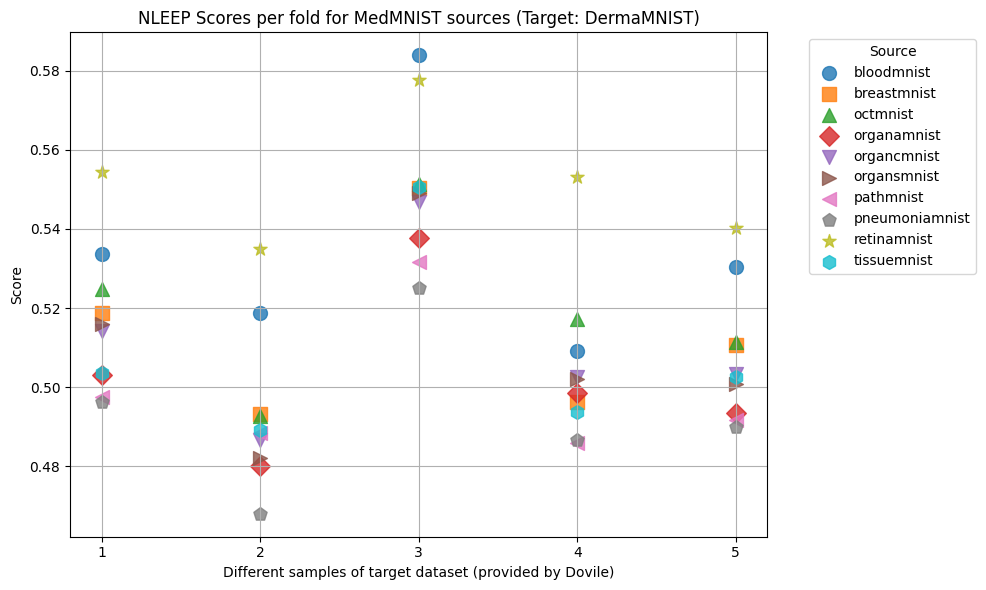

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to your 5 CSV files (adjust as needed)
csv_files = [
    "src/results/nleep_dataset_fold1.csv",
    "src/results/nleep_dataset_fold2.csv",
    "src/results/nleep_dataset_fold3.csv",
    "src/results/nleep_dataset_fold4.csv",
    "src/results/nleep_dataset_fold5.csv",
]

# List of unique markers for each source
markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h']
marker_map = {}  # Will be filled based on source names

# Store scores by source across folds
source_scores = {}

# Read and process each fold
for fold_idx, file in enumerate(csv_files):
    df = pd.read_csv(file)
    for idx, row in df.iterrows():
        source = row['source']
        score = row['dermamnist']
        if source not in source_scores:
            source_scores[source] = []
        source_scores[source].append((fold_idx + 1, score))  # fold index starts at 1

# Plotting
plt.figure(figsize=(10, 6))

for i, (source, points) in enumerate(source_scores.items()):
    x_vals = [pt[0] for pt in points]
    y_vals = [pt[1] for pt in points]
    marker = markers[i % len(markers)]
    plt.scatter(x_vals, y_vals, marker=marker, label=source, s=100, alpha=0.8)

# Plot settings
plt.xlabel("Different samples of target dataset (provided by Dovile)")
plt.ylabel("Score")
plt.title("NLEEP Scores per fold for MedMNIST sources (Target: DermaMNIST)")
plt.xticks(range(1, len(csv_files) + 1))
plt.grid(True)
plt.legend(title="Source", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
